In [71]:

# importando bibliotecas
import pandas as pd
import seaborn as srn
import statistics as sts
import datetime as dt

In [2]:
# Imporatando dados
dataset = pd.read_csv('../csv/produto.csv')

# Lendo o head dos dados
dataset.head()

,Produto,Preço,Quantidade,Categoria,Vendido_em
0,TV,2000,3.0,Eletrônico,2022-01-10
1,Geladeira,-1500,2.0,Eletrodoméstico,2022-01-11
2,Notebook,3500,NaN,ELETRONICOS,2022-01-13
3,Celular,1200,10.0,tech,NaN
4,Fone,200,0.0,Eletronico,2022-01-15


### Duplicatas

In [23]:
# Somando as duplicatas por produto
dataset.duplicated(subset=["Produto", "Vendido_em"]).sum()

np.int64(4)

In [25]:
# Deletando duplicatas
dataset.drop_duplicates(subset=["Produto","Vendido_em"], keep="first", inplace=True)

### Preços

Text(0.5, 1.0, 'Preços')

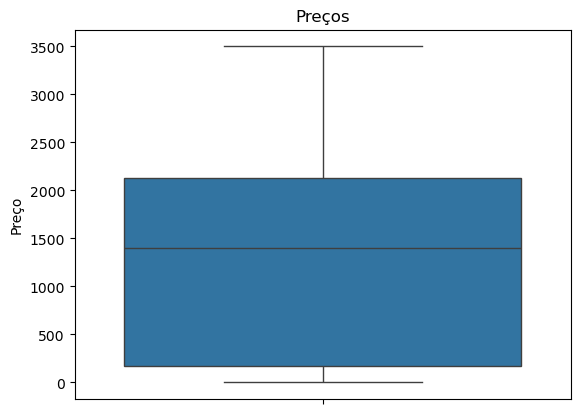

In [26]:
# Criando e analisando gráfico boxplot e displo
srn.boxplot(dataset["Preço"]).set_title('Preços')

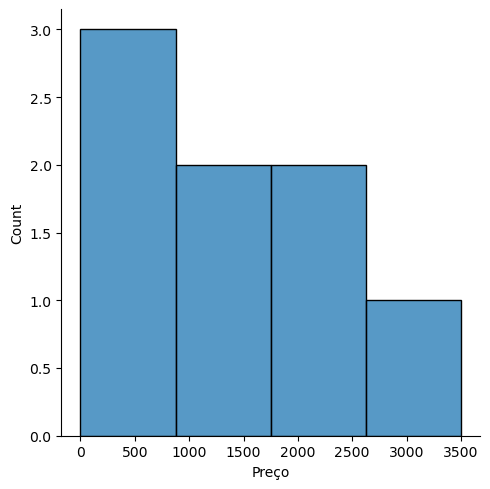

In [27]:
# Gráfico displot
srn.displot(dataset["Preço"]).set_titles('Preço')

In [28]:
# Vendo se há valores nulos nos preços
dataset["Preço"].isnull().sum()

np.int64(0)

#### Resultado da análise:
- Podemos notar que há valores negativos, o que não faz nenhum sentido!
- Não há valores nulos

##### O que fazer?
- Corrigir os valores que são inválidos

In [29]:
# Vendo quantos itens negativos existem
dataset.loc[dataset["Preço"] < 0]

,Produto,Preço,Quantidade,Categoria,Vendido_em


In [30]:
# Apenas um número negativo
# Substituiremos pela mediana dos preços, para não levar o preço negativo para a média
# Criando a mediana
mediana = sts.median(dataset["Preço"])
mediana

1400.0

In [31]:
# Substituindo valor negativo
dataset.loc[dataset["Preço"] < 0, "Preço"] = mediana

In [33]:
# Verificando
dataset.loc[dataset["Preço"] < 0]

,Produto,Preço,Quantidade,Categoria,Vendido_em


### Quantidade

In [37]:
# Verificando se existe alguma quantidade nula
dataset["Quantidade"].isnull().sum()

np.int64(1)

In [39]:
# Substituindo valor nulo pela moda
# Pegando a moda
moda = sts.mode(dataset["Quantidade"])
moda

2.0

In [44]:
# Substituindo
dataset.fillna({"Quantidade":moda}, inplace=True)

In [45]:
# Verificando se existe AINDA alguma quantidade nula
dataset["Quantidade"].isnull().sum()

np.int64(0)

### Categoria

In [48]:
# Analisando quantas categorias existem
agrupado = dataset.groupby(["Categoria"]).size()
agrupado

Categoria
ELETRONICOS        1
EletroDoméstico    1
Eletrodoméstico    2
Eletronico         1
Eletrônico         1
acessórios         1
tech               1
dtype: int64

#### Pontos a se notar:
- Muitas categorias repetidas de formas diferentes

#### O que fazer?
##### Padronizar as categorias para:
- Eletrônico
- Eletrodoméstico
- Acessórios
- Tech

In [49]:
# Padronizações
dataset.loc[dataset["Categoria"].isin(['ELETRONICOS','Eletronico']), "Categoria"] = "Eletrônico"
dataset.loc[dataset["Categoria"] == 'EletroDoméstico', "Categoria"] = "Eletrodoméstico"
dataset.loc[dataset["Categoria"] == 'acessórios', "Categoria"] = "Acessórios"
dataset.loc[dataset["Categoria"] == 'tech', "Categoria"] = "Tech"

In [52]:
# Verificando como estão os grupos agora
agrupado = dataset.groupby(["Categoria"]).size()
agrupado

Categoria
Acessórios         1
Eletrodoméstico    3
Eletrônico         3
Tech               1
dtype: int64

In [ ]:
srn.countplot(x= 'X', data=dataset["Categoria"])

In [54]:
# Há algum item sem categoria?
dataset["Categoria"].isnull().sum()

np.int64(0)

### Vendido_em

In [60]:
# Verificando se há datas nulas
dataset["Vendido_em"].isnull().sum()

np.int64(1)

In [62]:
# Substituindo pela moda
# Pegando moda
moda = sts.mode(dataset["Vendido_em"])
moda

'2022-01-10'

In [65]:
# Substituindo
dataset.fillna({"Vendido_em": moda},inplace=True)

In [67]:
# Analisando se todas as datas estão no formato correto de data do pd
dataset["Vendido_em"] = pd.to_datetime(dataset["Vendido_em"], errors="coerce")

In [70]:
# Verificando se há datas nulas agora
dataset["Vendido_em"].isnull().sum()

np.int64(0)

In [72]:
#Separando as datas para melhor comparação de dados 
dataset["Ano"] = dataset["Vendido_em"].dt.year
dataset["Mês"] = dataset["Vendido_em"].dt.month
dataset["Dia"] = dataset["Vendido_em"].dt.day


In [73]:
# Vendo como está o head agora
dataset.head()

,Produto,Preço,Quantidade,Categoria,Vendido_em,Ano,Mês,Dia
0,TV,2000,3.0,Eletrônico,2022-01-10,2022,1,10
1,Geladeira,1600,2.0,Eletrodoméstico,2022-01-11,2022,1,11
2,Notebook,3500,2.0,Eletrônico,2022-01-13,2022,1,13
3,Celular,1200,10.0,Tech,2022-01-10,2022,1,10
4,Fone,200,0.0,Eletrônico,2022-01-15,2022,1,15
